# Week 10 Scratch Paper and Notes

In [ ]:
## Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import set_config
set_config(display='diagram')


In [ ]:
## Data Filepaths
iris_filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Dimensionality Reduction
Working with big data means working with a lot of columns. This is challenging to for humans to work with but great for machine learning.
- The Curse of Dimensionality: The more features (dimensions) the more data needed to accurately generalize the model.

Dimensionality Reduction refers to techniques used to reduce the feature space
- Feature Selection: Process of selecting a subset of the features to model.
- Feature Extraction: Process of taking and combining features to reduce dimensions. Usually done through Principal Componenet Analysis (PCA) or Linear Discriminant Analysis (LDA)

# Principal Component Analysis
Unsupervised learning technique applied to our features which reduces the dimensionality of the dataset. 

PCA transforms the features into Principal Components - linear combinations of all our original features. Principal Components are arranged in order of how much variability they explain.

Useful for:
- Visualization: Lower number of features allow for better clustering and visuals.
- Dimensionality Reduction: Improves model speed.

### Python Example - PCA for Visualization

In [ ]:
# Load/Check Data
df = pd.read_csv(iris_filepath, names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Train Test
X = df.drop(columns = 'target')
le = LabelEncoder()
y = le.fit_transform(df['target'])

In [ ]:
# Scale Data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [ ]:
# Apply PCA
pca = PCA(n_components = 2) #Instantiate PCA 
pcs = pca.fit_transform(scaled_df) # Create princical components

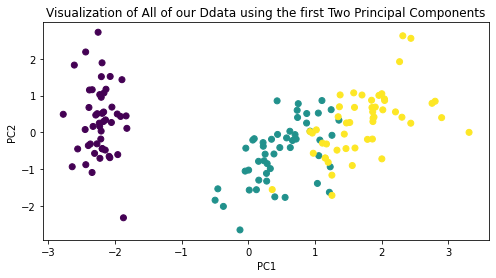

In [ ]:
# Visualize
plt.figure(figsize = (8,4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualization of All of our Ddata using the first Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2');

### Python Example - PCA to Speed Up ML

In [ ]:
# Load/Check Data
df = pd.read_csv('/content/drive/MyDrive/Data/wisconsinBreastCancer.csv', index_col= 'id')
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Drop extra columns
df.drop(columns = 'Unnamed: 32', inplace = True)

# Binarize target columns
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Create target/features
X = df.drop(columns = 'diagnosis')
y = df['diagnosis']

In [ ]:
X.shape

(569, 30)

In [ ]:
# Instantiate Scaler and transform data. 
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

In [ ]:
from matplotlib import scale
pca = PCA()
pca.fit(scaled_df)

PCA()

By default PCA will return the same number of principal components as the original number of features . These will explain 100% of variance... however, this doesnt reduce dimensionality .

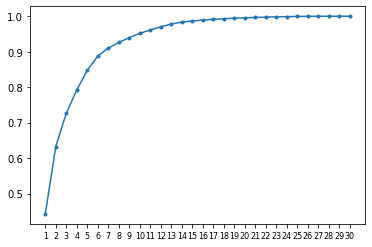

In [ ]:
# Choosing the Number of Components to Return

# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range (1,31), pca.explained_variance_ratio_.cumsum(), marker = '.')
plt.xticks(ticks = range(1,31), fontsize=8);

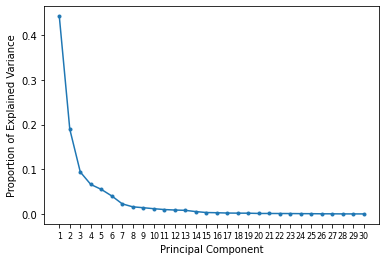

In [ ]:
# Plot the explained variance ratios of the first 39 principal components
plt.plot(range(1,31), pca.explained_variance_ratio_, marker ='.')
plt.xticks(ticks = range(1,31), fontsize = 8)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

A scree plot (like the one above) tracks the contribution of each component separately. You can see the first PCS explains ~40% of the variance, the second ~20%, etc etc... 

Using the elbow method we can see an inflection on or around 7 principal components where we see diminishing further components. 

In [ ]:
# PCA with 7 components
pca7 = PCA(n_components=7)

We can also specify an ammount of variance explained and PCA will reduce the number of components down to explain that ammount of variance. 

to specify a proportion of variance explained give n_components a float value between 0 and 1. 

In [ ]:
pca85 = PCA(n_components = .85)

Example of PCA with supervised learning...

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3)

In [ ]:
transform = make_pipeline(StandardScaler(), PCA(n_components=7))

In [ ]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(transform, logreg)
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
print('training accuracy:', logreg_pipe.score(X_train, y_train))
print('testing accuracy:', logreg_pipe.score(X_test, y_test))

training accuracy: 0.9812206572769953
testing accuracy: 0.972027972027972


# Feature Engineering
Feature Engineering is when you add/modify featuers to your data to increase the performance of your model. 

## Feature Engineering - Overloaded Operators
Use binary operators such as +,-,*, and /. Pandas 'overloads' many of these operators so they can be applyed to elementwise pairs, allowing us to combine two (or more) features into one.

In [ ]:
# Load Data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vReZBM5OC6GLYbacisp_ToNiu3CLWxqPXw7mWBsdRjnYOFLWNufdQ4qd8u5qTzUF2_sBUAMEi5cgy1U/pub?gid=1040198428&single=true&output=csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
## Summing Features: Reduce the number of features by adding/combining them.
df['TotalFamily'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,TotalFamily
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
## Concatenate Features:
# Round age to the nearest 10.
df['Age'] = df['Age'].round(-1)

df['GenderAge'] = df['Sex'] + df['Age'].astype('string')
df.drop(columns = ['Age', 'Sex'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,Embarked,TotalFamily,GenderAge
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,NaN,S,1,male20.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,C,1,female40.0
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,S,0,female30.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,S,1,female40.0
4,5,0,3,"Allen, Mr. William Henry",373450,8.0500,NaN,S,0,male40.0


In [ ]:
## Squaring and Multiplying Features: Use to normalize and make other manipulations
df['NormedFare'] = df['Fare'] * df['Pclass']**2
df.drop(columns ='Fare', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Ticket,Cabin,Embarked,TotalFamily,GenderAge,NormedFare
0,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,NaN,S,1,male20.0,65.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C,1,female40.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S,0,female30.0,71.3250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S,1,female40.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",373450,NaN,S,0,male40.0,72.4500


## Feature Engineering - Strings
Strig methods can be applied to an entire column using the .str. This allows us to combine string columns or make new columns out of existing ones.

String Methods = https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods 

In [ ]:
# Splitting a column into two:
df[['LastName', 'FirstName']] = df['Name'].str.split(',', expand = True)

df.drop(columns = 'Name', inplace = True)
df.head()

,PassengerId,Survived,Pclass,Ticket,Cabin,Embarked,TotalFamily,GenderAge,NormedFare,LastName,FirstName
0,1,0,3,A/5 21171,NaN,S,1,male20.0,65.2500,Braund,Mr. Owen Harris
1,2,1,1,PC 17599,C85,C,1,female40.0,71.2833,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,STON/O2. 3101282,NaN,S,0,female30.0,71.3250,Heikkinen,Miss. Laina
3,4,1,1,113803,C123,S,1,female40.0,53.1000,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,373450,NaN,S,0,male40.0,72.4500,Allen,Mr. William Henry


In [ ]:
# Clean up the whitespace from the split...
df['FirstName'] = df['FirstName'].str.strip()

In [ ]:
# We can combined strings as well... lets put it back together again...
df['Name'] = df['FirstName'] + ' ' + df['LastName']
df.drop(columns=['LastName', 'FirstName'], inplace = True)
df.head()

,PassengerId,Survived,Pclass,Ticket,Cabin,Embarked,TotalFamily,GenderAge,NormedFare,Name
0,1,0,3,A/5 21171,NaN,S,1,male20.0,65.2500,Mr. Owen Harris Braund
1,2,1,1,PC 17599,C85,C,1,female40.0,71.2833,Mrs. John Bradley (Florence Briggs Thayer) Cum...
2,3,1,3,STON/O2. 3101282,NaN,S,0,female30.0,71.3250,Miss. Laina Heikkinen
3,4,1,1,113803,C123,S,1,female40.0,53.1000,Mrs. Jacques Heath (Lily May Peel) Futrelle
4,5,0,3,373450,NaN,S,0,male40.0,72.4500,Mr. William Henry Allen


## Feature Engineering - Datetime
We ca use pd.to_datetime to manipulate dates and allow us to find correlations within the data that might not otherwise be apparent. We can look at months/days/years linearly as well as OHE them to see if there are patterns beyond the linear.

Datetime optios: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [ ]:
# Load King County Dataset as DF2
df2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSrgrUnz8mdosU-_k0aECouymqwds_mlaHpYlXzRtf7MBJ4N1r1inCfSDebaXwTVfLtH133EhwKf3mi/pub?gid=394699239&single=true&output=csv',                  usecols=['date','price','bedrooms','bathrooms'])
df2.head()

,date,price,bedrooms,bathrooms
0,20141013T000000,221900.0,3,1.00
1,20141209T000000,538000.0,3,2.25
2,20150225T000000,180000.0,2,1.00
3,20141209T000000,604000.0,4,3.00
4,20150218T000000,510000.0,3,2.00


In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2.head()

,date,price,bedrooms,bathrooms
0,2014-10-13,221900.0,3,1.00
1,2014-12-09,538000.0,3,2.25
2,2015-02-25,180000.0,2,1.00
3,2014-12-09,604000.0,4,3.00
4,2015-02-18,510000.0,3,2.00


In [ ]:
# Note that these are a mix of methods and attributes

df2['year'] = df2['date'].dt.year
df2['month (numeric)'] = df2['date'].dt.month
df2['month (name)'] = df2['date'].dt.month_name()
df2['day of month'] = df2['date'].dt.day
df2['day of week (numeric)'] = df2['date'].dt.weekday
df2['day of week (name)'] = df2['date'].dt.day_name()
df2.head()

,date,price,bedrooms,bathrooms,year,month (numeric),month (name),day of month,day of week (numeric),day of week (name)
0,2014-10-13,221900.0,3,1.00,2014,10,October,13,0,Monday
1,2014-12-09,538000.0,3,2.25,2014,12,December,9,1,Tuesday
2,2015-02-25,180000.0,2,1.00,2015,2,February,25,2,Wednesday
3,2014-12-09,604000.0,4,3.00,2014,12,December,9,1,Tuesday
4,2015-02-18,510000.0,3,2.00,2015,2,February,18,2,Wednesday


## Feature Engineering - Functions
Sometimes we will want to use functions like series.apply() or lamda functions to change features.

In [ ]:
# Upload clean version of the titanic dataframe as DF.
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vReZBM5OC6GLYbacisp_ToNiu3CLWxqPXw7mWBsdRjnYOFLWNufdQ4qd8u5qTzUF2_sBUAMEi5cgy1U/pub?gid=1040198428&single=true&output=csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Use apply to alter ticket fare to cheap/expensive
median_fare = df['Fare'].median()

def bin_fare(fare):
    if fare > median_fare:    
        return 'Expensive'  
    else:    
        return 'Cheap'

In [ ]:
df['Fare'] = df['Fare'].apply(bin_fare)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,Cheap,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,Expensive,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,Cheap,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,Expensive,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,Cheap,NaN,S


In [ ]:
# Lambda functions are single use functions contained in apply. Used when we dont need to call the function multiple times.
df['Age'] = df['Age'].apply(lambda x: 'elderly' if x > 30 else 'young')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,young,1,0,A/5 21171,Cheap,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,elderly,1,0,PC 17599,Expensive,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,young,0,0,STON/O2. 3101282,Cheap,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,elderly,1,0,113803,Expensive,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,elderly,0,0,373450,Cheap,NaN,S
